<br><img src="cifar10_logo.JPG", width=150, ALIGN="left", border=20>
<center>
<h1>Cifar10 Challenge Starting Kit</h1>
<br>This code was tested with <br>
Python 2.7.13 | Anaconda 4.3.1 (https://anaconda.org/)<br>
<i> Adapted for Chalab by Isabelle Guyon from original code of Balázs Kégl</i> <br>
<a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science (CDS)</a>
</center>
<p><br>

ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 

# Introduction

<br>
Cifar10 is a small standard multi-class classification data set from this <a href="https://www.cs.toronto.edu/~kriz/cifar.html">website</a>, formatted in the AutoML format.

In [1]:
import numpy as np
model_dir = 'sample_code_submission/'          
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns; sns.set()

# Step 1: Exploratory data analysis
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.

In [2]:
datadir = 'sample_data'              # Change this to the directory where you put the input data
dataname = 'cifar10'
!ls $datadir*

cifar10_feat.name    cifar10_test.data	    cifar10_train.solution
cifar10_label.name   cifar10_test.solution  cifar10_valid.data
cifar10_public.info  cifar10_train.data     cifar10_valid.solution


For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data.

In [3]:
from data_io import read_as_df
data = read_as_df(datadir  + '/' + dataname)                # The data are loaded as a Pandas Data Frame

Reading sample_data/cifar10_train from AutoML format
Number of examples = 1000
Number of features = 256
Number of classes = 10


In [4]:
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,target
0,0.000000,0.0,0.000000,0.971831,0.00000,0.237825,0.0,0.000000,4.582240,0.000000,...,1.071270,0.0,1.13465,0.000000,3.72576,2.518420,0.0,1.867780,2.79299,frog
1,0.705386,0.0,0.953680,0.000000,3.64746,0.000000,0.0,0.000000,0.206124,0.000000,...,1.213560,0.0,0.00000,0.000000,1.73826,0.000000,0.0,0.755148,1.46196,automobile
2,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,3.704580,0.000000,...,0.517879,0.0,0.00000,0.831314,3.63862,0.924173,0.0,4.002000,2.84157,frog
3,0.000000,0.0,0.114685,1.914960,0.00000,0.000000,0.0,0.118838,1.791660,0.000000,...,0.347925,0.0,2.36946,0.722686,3.82811,0.411937,0.0,2.211020,3.02779,frog
4,0.000000,0.0,0.000000,0.000000,0.00000,0.929534,0.0,0.000000,0.000000,0.436912,...,1.515330,0.0,0.00000,0.000000,0.00000,2.957710,0.0,1.208070,0.00000,ship


In [5]:
data.describe() 

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.292992,0.035396,0.700226,0.400874,1.294882,0.277236,0.531522,0.065868,0.507029,0.670609,...,0.433320,0.354934,0.023223,0.511755,0.389800,0.679792,2.205072,0.641289,1.666970,0.693792
std,0.596710,0.163784,1.435478,1.327785,1.516483,0.602914,1.094835,0.274350,0.931115,1.445104,...,0.997405,0.609955,0.163639,0.832284,0.754649,1.370731,1.837833,1.765438,1.688540,1.226615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.606006,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.739275,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.012585,0.000000,1.201800,0.000000
75%,0.304501,0.000000,0.435712,0.000000,2.135430,0.173835,0.539599,0.000000,0.666647,0.440641,...,0.054449,0.531211,0.000000,0.819891,0.464264,0.727678,3.426335,0.075498,2.671687,0.916790
max,4.420420,1.708790,7.588520,10.957100,7.243310,3.931260,7.051080,3.224520,5.644760,9.508800,...,6.260280,3.455330,2.338530,5.383730,4.494660,6.880400,8.262500,11.453600,6.874390,6.151250


In [6]:
from sklearn.manifold import TSNE
x_tr = data.as_matrix()[:,:-1]
y_tr = data.as_matrix()[:,-1]
print(x_tr.shape, y_tr.shape)
var_tsne = TSNE(n_components=2, init='pca', perplexity=15).fit_transform(x_tr)

((1000, 256), (1000,))


In [7]:
from sklearn.manifold import Isomap
var_iso = Isomap(n_components=2).fit(x_tr).fit_transform(x_tr)

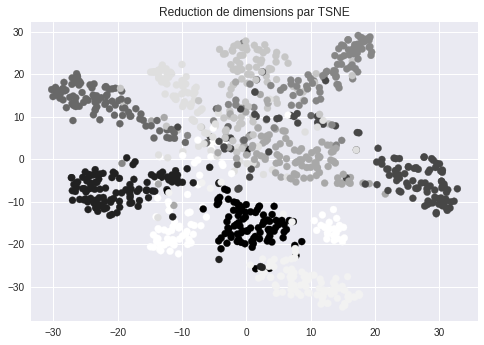

In [8]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y_tr)
y = le.transform(y_tr)
plt.figure()
plt.scatter(var_tsne[:,0], var_tsne[:,1], c=[y])
plt.title('Reduction de dimensions par TSNE')
plt.show()

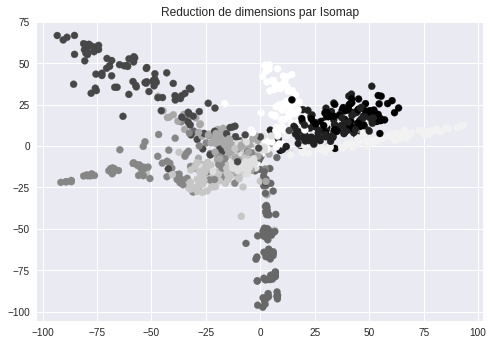

In [9]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y_tr)
y = le.transform(y_tr)
plt.figure()
plt.scatter(var_iso[:,0], var_iso[:,1], c=[y])
plt.title('Reduction de dimensions par Isomap')
plt.show()

In [10]:
def plot_corr(df,size=10):
    '''Plot a graphical correlation matrix for a dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Compute the correlation matrix for the received dataframe
    corr = df.corr()
    
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='Greys')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)

In [11]:
import pandas as pd
import numpy as np


n_variables = 256
n_samples = 1000

cluster_size = []
n_clusters = len(cluster_size)

# Assign each variable to a cluster
belongs_to_cluster = [i for i, c in enumerate(cluster_size) for n in range(c)]
np.random.shuffle(belongs_to_cluster)

# This latent data is used to make variables that belong
# to the same cluster correlated.
latent = np.random.randn(n_clusters, n_samples)

variables = []
#for i in range(n_variables):
 #   variables.append(np.random.randn(n_samples) + latent[belongs_to_cluster[i], :])

df = data

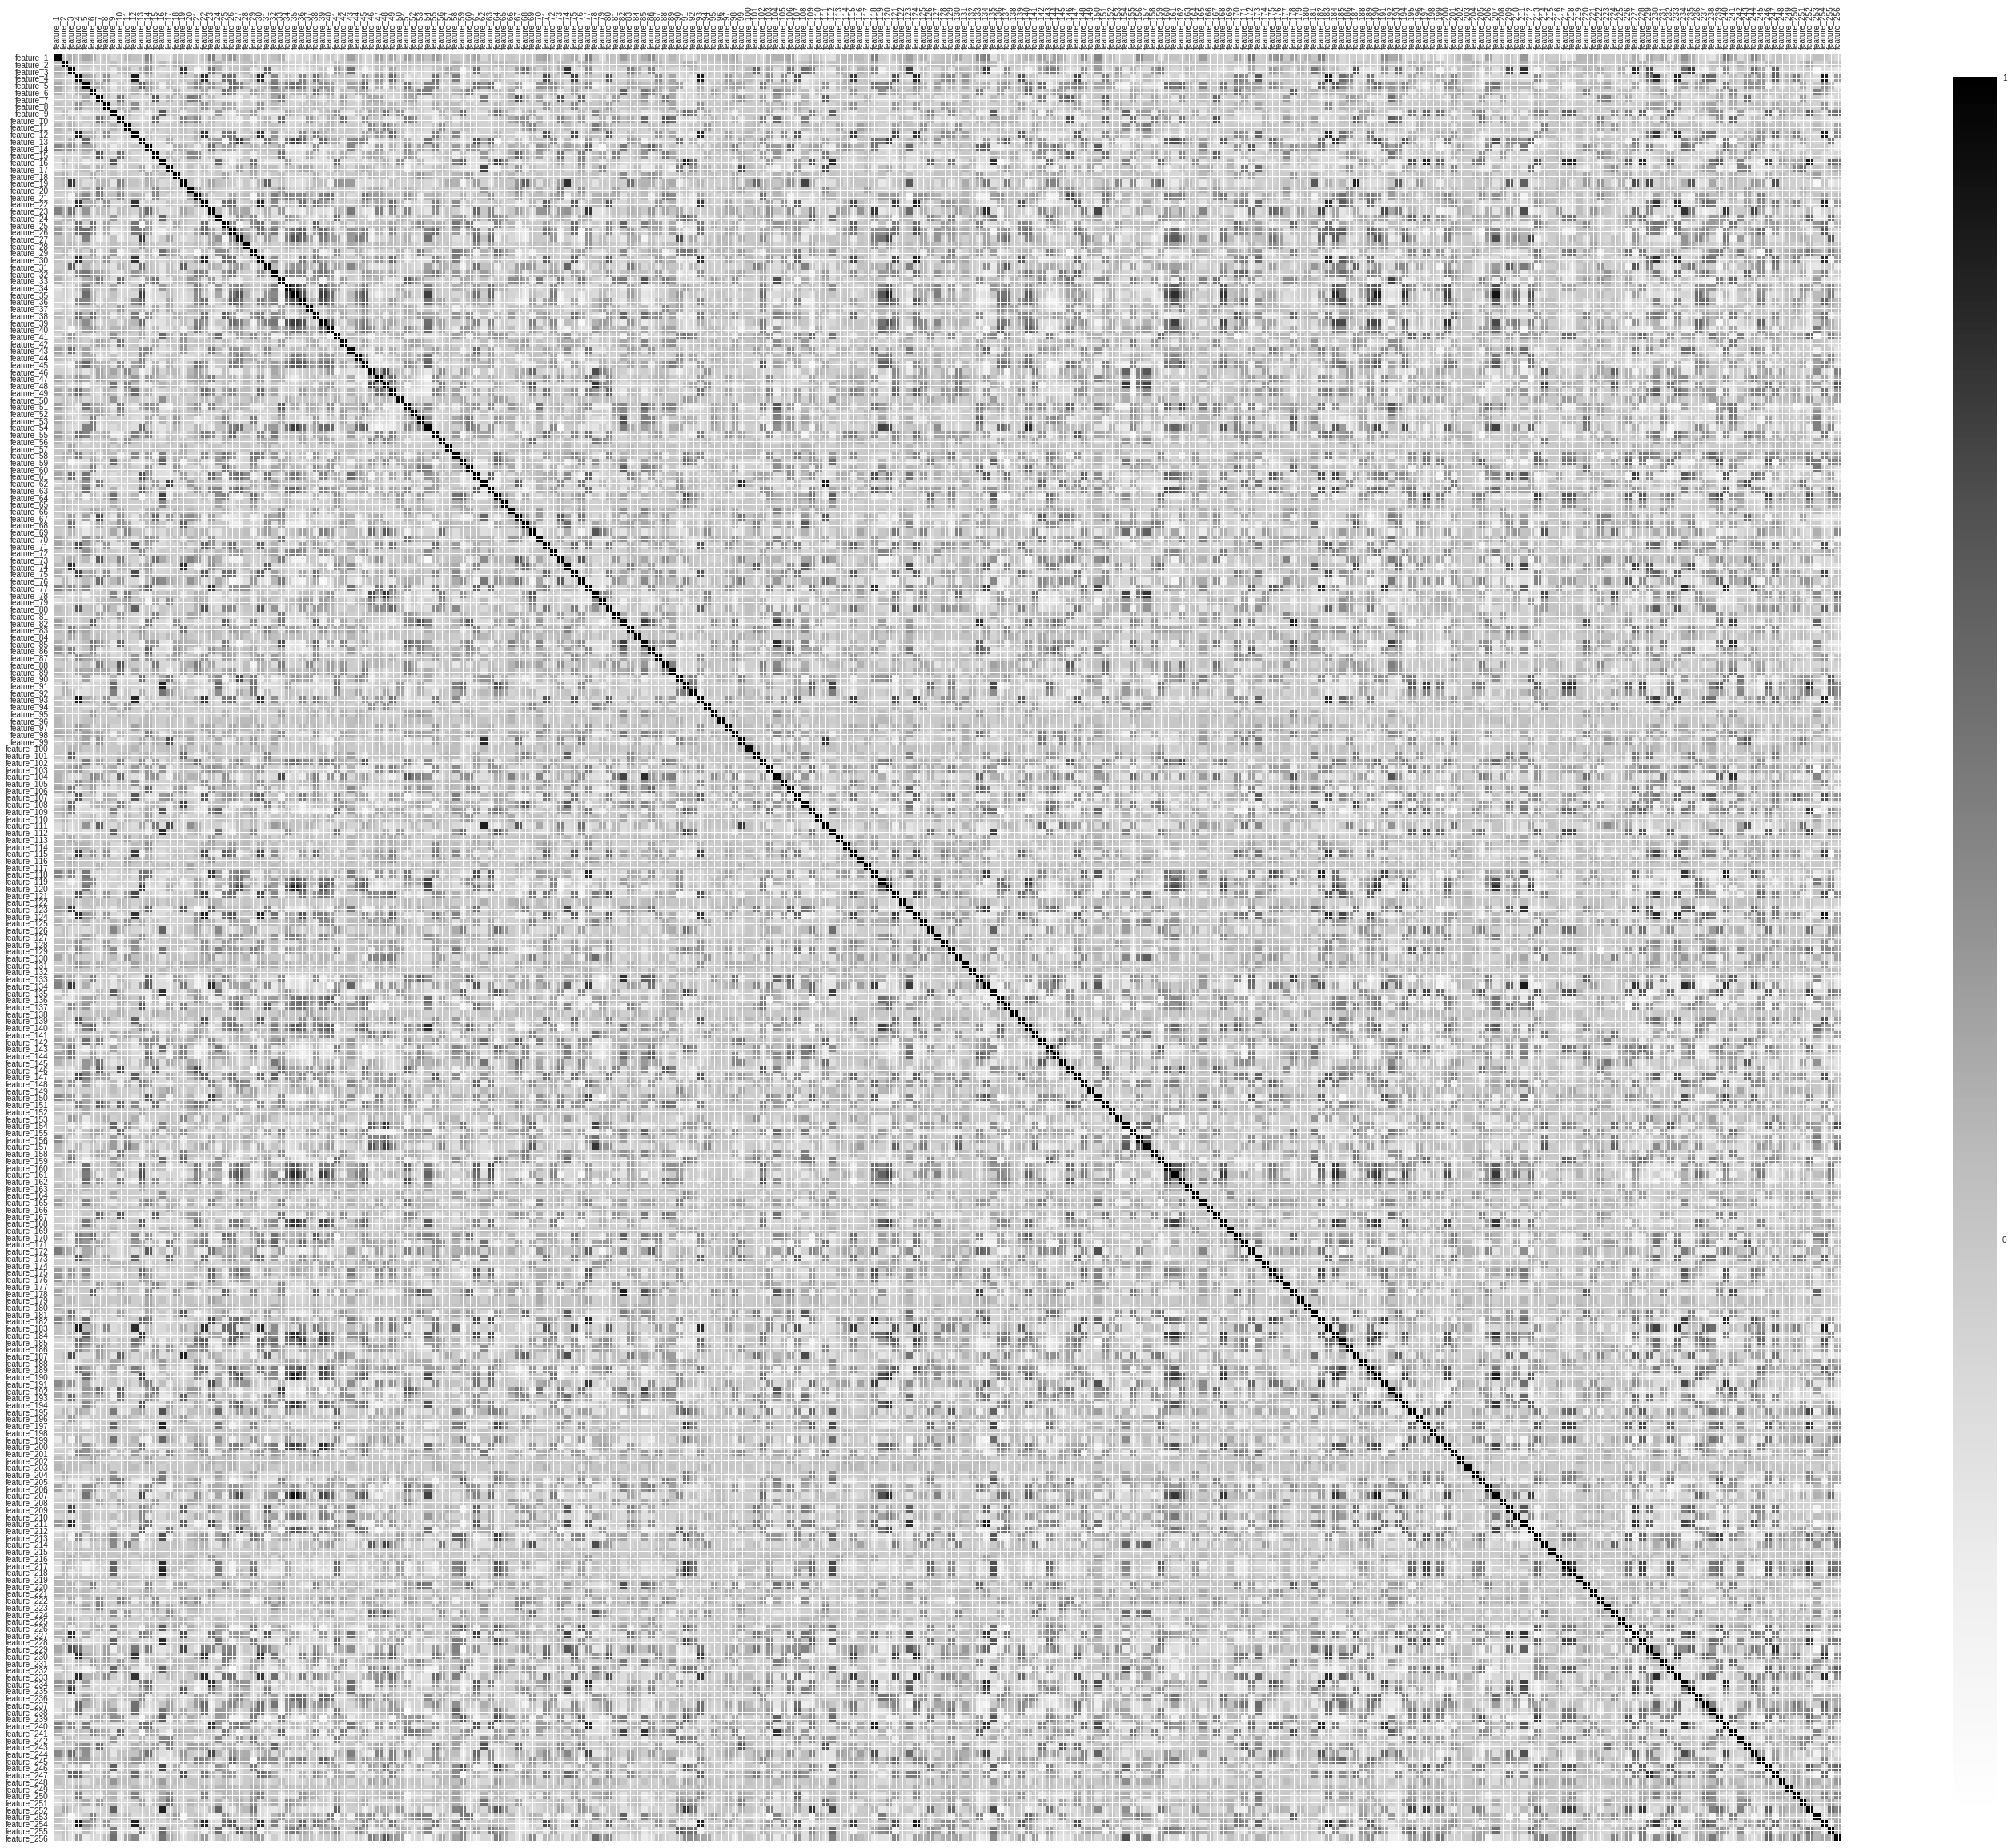

In [12]:
plot_corr(df, size=50)

In [13]:
import scipy
import scipy.cluster.hierarchy as sch

X = df.corr().values
d = sch.distance.pdist(X)   # vector of ('256' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [df.columns.tolist()[i] for i in list((np.argsort(ind)))]
df = df.reindex(columns, 1)

plot_corr(df, size=50)


TypeError: 'int' object is not iterable

In [ ]:
import seaborn as sns
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn import datasets
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt

n_f = 256
data_mat = data.as_matrix()
mat_cor = np.zeros((n_f, n_f))
for f1 in range(n_f):
    a = data_mat[:,f1].astype(float)
    for f2 in range(f1, n_f):
        b = data_mat[:,f2].astype(float)
        
        cor = abs(np.corrcoef(a,b)[0][1])
        mat_cor[f1,f2] = cor
        mat_cor[f2,f1] = cor

f, ax = plt.subplots(figsize=(50,50))
plt.title('Matrice de correlation')


sns.heatmap(mat_cor, 0.0, ax = ax)

In [ ]:
sns.pairplot(df, hue = 'cut')

In [ ]:
import matplotlib as plt
import numpy as np
res = []
for d in data.as_matrix() :
    for i in range(len(d)):
        res.append(d[i])

plt.pyplot.hist(np.asarray(res))

# Step 2: Building a predictive model

## Loading data with DataManager
We reload the data with the AutoML DataManager class because this is more convenient:

In [ ]:
from data_manager import DataManager
D = DataManager(dataname, datadir, replace_missing=True)
print(D)

## Training a predictive model
We provide an example of predictive model (for classification or regression) in the `sample_code_submission/` directory. It is a quite stupid model: it makes constant predictions. Replace it with your own model.

In [ ]:
from model import model
??model 

Create an instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:


In [ ]:
M = model()
trained_model_name = model_dir + dataname
#M = M.load(trained_model_name) # Attempts to re-load an already trained model
M.define_model('GaussianNB')

Train and run your predictive model. If you saved have an aldeady trained model saved in sample_code_submission, the evaluation script will reload it and not retrain, just test. This will happen the second time you run the code because when the model is trained it gets saved. So delete cifar10_model.pickle from sample_code_submission if you do not want this to happen.

In [ ]:
print(M.is_trained)
if not(M.is_trained):
    X_train = D.data['X_train']
    Y_train = D.data['Y_train']
    print(X_train.shape)
    M.fit(X_train, Y_train)   

# print(len(y), y)
Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])
print(str(trained_model_name))

Save the trained model (will be ready to reload next time around) and save the prediction results:

In [ ]:
import pickle
# save result from probability predictions
def save_result(name_file, preds):
    label_max = 9
    preds_label = np.argmax(preds, axis=1)
    f = open(name_file, 'w')
    for pred in preds_label:

        pred = int(pred)
        tableau_pred = np.zeros((10, ), dtype=np.int)
        tableau_pred[pred] = 1
        for cpt, val in enumerate(tableau_pred):
            f.write(str(val))
            if cpt != label_max:
                f.write(' ')
            else:
                f.write('\n')
    f.close()


In [ ]:
from data_converter import convert_to_bin


M.save(trained_model_name)                 
result_name = 'sample_result_submission/' + dataname
from data_io import write
# convert predict proba to binary label prediction
write(result_name + '_valid.predict', convert_to_bin(np.argmax(Y_hat_valid, axis=1), 10))
write(result_name + '_test.predict', convert_to_bin(np.argmax(Y_hat_test, 1), 10))
!ls $result_name*

## Scoring the results
### Load the challenge metric
<b>The metric chosen for your challenge</b> is identified in the "metric.txt" file found in the `scoring_function/` directory. We use here the `mse_metric` metric (an example of organizer-supplied metric found in `my_metric.py`), which computes the mean-square-error. You may change that in the "metric.txt" file to e.g. use `bac_multiclass`, one of the AutoML challenge metrics found in `libscores.py`, which is 2*(balanced_accuracy)-1.


In [ ]:
with open(score_dir + '/metric.txt', 'r') as f:
    metric_name = f.readline().strip()
import libscores, my_metric
try:
    scoring_function = getattr(libscores, metric_name)
except:
    scoring_function = getattr(my_metric, metric_name)
print('Using scoring metric:', metric_name)
??scoring_function

### Training performance
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.

In [ ]:
#name_label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print 'Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train)
print 'Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train)

Be careful: some metrics use one-hot encoding for multi-class classification problems, but other use class numbers. So you need to convert the target values and predicted values if you want to use those. This is the case of `scikit-learn` metrics.


In [ ]:
# Convert targets and predictions for vectors of class numbers:
from data_converter import convert_to_num

y_train = convert_to_num(Y_train, verbose=False)

# find the predicted label from the predicted proba
Y_hat_train_label= np.argmax(Y_hat_train, axis=1)

# Compute accuracy and confusion matrix:

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#print 'y_train     =' , y_train
#print 'y_hat_train =' , y_hat_train
print('Training accuracy =', accuracy_score(y_train, Y_hat_train_label))
print('Confusion matrix [known in lines, predicted in columns]=',confusion_matrix(y_train, Y_hat_train_label))

### Cross-validation performance
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development.


In [ ]:
from sklearn.model_selection import KFold
from numpy import zeros, mean
# 3-fold cross-validation
n = 3
kf = KFold(n_splits=n)
kf.get_n_splits(X_train)
i=0
scores = zeros(n)
for train_index, test_index in kf.split(X_train):
    Xtr, Xva = X_train[train_index], X_train[test_index]
    Ytr, Yva = Y_train[train_index], Y_train[test_index]
    M = model()
    M.fit(Xtr, Ytr)
    Yhat = M.predict(Xva)
    scores[i] = scoring_function(Yva, Yhat)
    #print ('Fold', i+1, 'example metric = ', scores[i])
    i=i+1
print ('Average score = ', mean(scores))

# Step 3: Making a submission

## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 

In [ ]:
outdir = 'sample_result_submission'     

In [ ]:
!python $problem_dir/ingestion.py $datadir $outdir $problem_dir $model_dir

## Preparing the submission

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.